In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

In [8]:
targetFolder = os.path.abspath('/root/AudioT/data/flock4001-2020-07')
filesL = os.listdir(targetFolder)

In [9]:
filesN = filesL[1].split('.')[0]

In [10]:
def titleMetadata(filename):
    wh = filename.split('_')[0]
    Date = filename.split('_')[1]
    year = Date.split('-')[0]
    MthType = Date.split('-')[1]
    month = MthType[0:2]
    inc = MthType[2:3]
    
    return wh, year, month, inc

In [11]:
def createDirs(root, dirList):
    finDirs = []
    for items in dirList:
        path = os.path.join(root, items)
        if not os.path.exists(path):
            os.mkdir(path)
        finDirs.append(path)
    return finDirs

In [12]:
def CummulativeWWFGraphs(targetFolder, granularity = 'H'):
    filesL = os.listdir(targetFolder)
    for filename in filesL:
        wh, year, month, inc = titleMetadata(filename)
        if inc == granularity:
            tempFile = os.path.join(targetFolder, filename)
            df = pd.read_excel(tempFile)
            df['Period'] = range(1, len(df)+1)
            df['AvgWeight'] = (df['birdWeightMax'] + df['birdWeightMin']) / 2
            normWeight = df['AvgWeight']/max(df['AvgWeight'])
            normWater = df['water1']/max(df['water1'])
            normFeed = df['accumulatedFeedConsumed']/max(df['accumulatedFeedConsumed'])
            plt.figure(figsize=(10, 7))
            plt.plot(df['Period'], normWeight, label = 'Normed Weight')
            plt.plot(df['Period'], normWater, label = 'Normed Water Consumption')
            plt.plot(df['Period'], normFeed, label = 'Normed Feed Consumption')
            plt.legend(loc="upper left")
            plt.title(wh)
            plt.xlabel('Periods')

            #Check to see if directory exists if not, create it, then save graphs. 
            cwd = os.getcwd()
            adir = os.path.dirname(cwd)
            savepath = os.path.join(adir, 'results')
            resFol = createDirs(savepath, ['EDA_graphs'])
            plt.savefig(resFol[0] + '/' + filename.split('.')[0]+'CWWF.png')

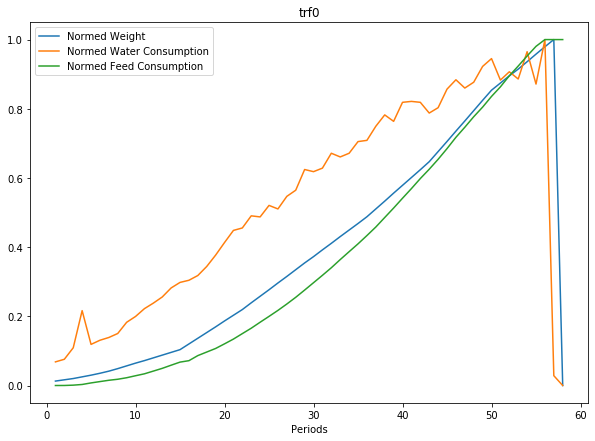

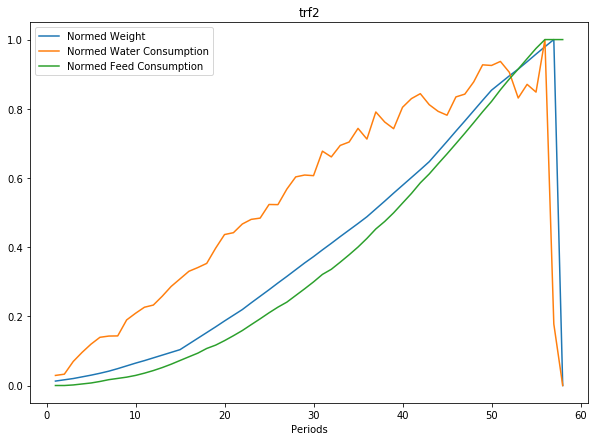

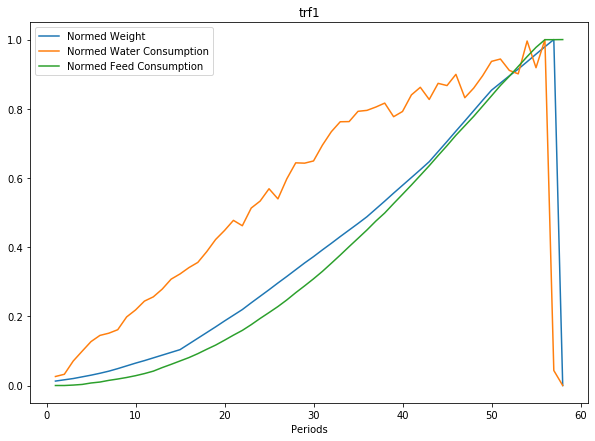

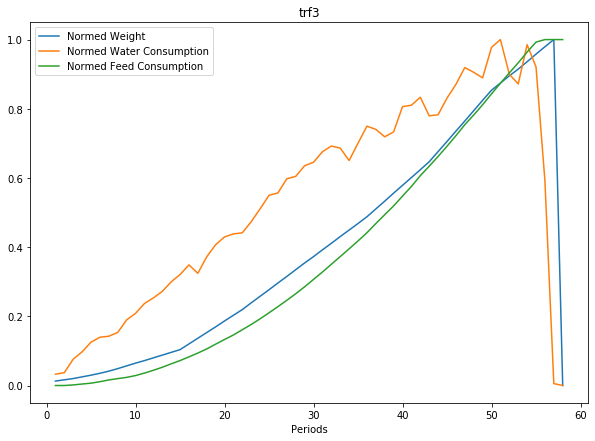

In [14]:
CummulativeWWFGraphs(targetFolder, 'D')

In [35]:
def featureDelta(feature, df): #feature can be "water", "humidity", "temperature", or "birdWeight"
    featureMX = feature+'Max'
    featureMN = feature+'Min'
    delta = df[featureMX] - df[featureMN]
        
    return delta

In [41]:
def minMaxDeltaGraphs(targetFolder, features = ["water", "humidity", "temperature", "birdWeight"], granularity = 'H'):
    for f in features:
        filesL = os.listdir(targetFolder)
        plt.figure(figsize=(10, 7))
        for filename in filesL:
            wh, year, month, inc = titleMetadata(filename)
            if inc == granularity:
                tempFile = os.path.join(targetFolder, filename)
                df = pd.read_excel(tempFile)
                delta = featureDelta(f, df)
                plt.plot(delta, label = wh)
        plt.legend(loc="upper left")
        plt.title(f)
        plt.xlabel('Periods')
        
        cwd = os.getcwd()
        adir = os.path.dirname(cwd)
        savepath = os.path.join(adir, 'results')
        resFol = createDirs(savepath, ['EDA_graphs'])
        plt.savefig(resFol[0] + '/' + year + '-'+ month +'MMD' + inc + '.png')

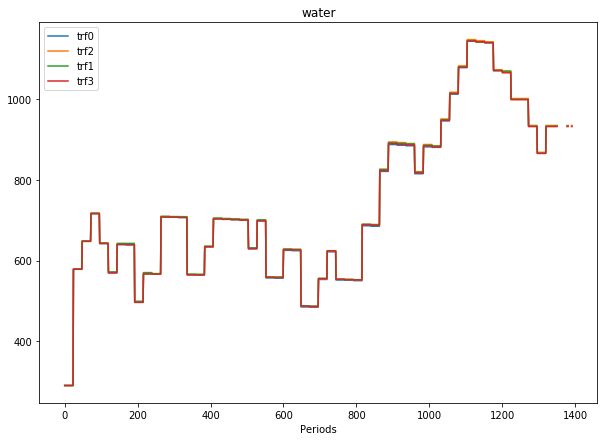

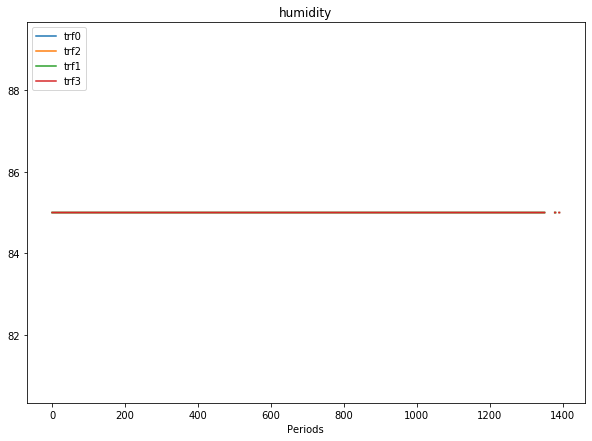

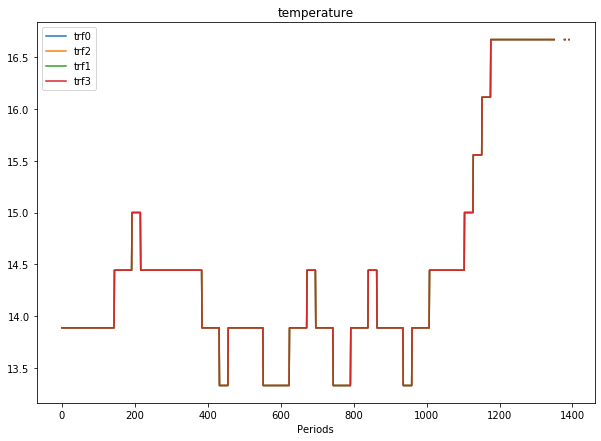

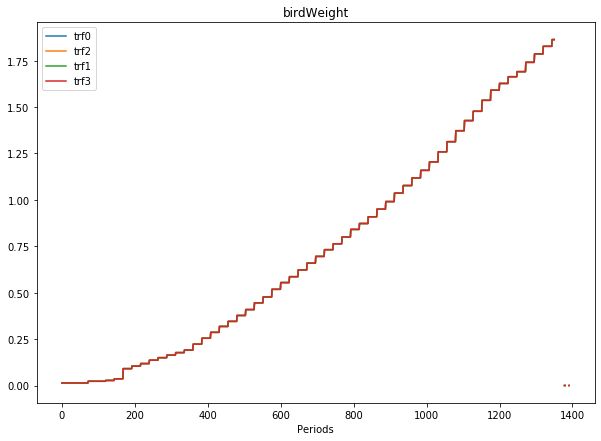

In [42]:
minMaxDeltaGraphs(targetFolder, features = ["water", "humidity", "temperature", "birdWeight"], granularity = 'H')

In [54]:
def uplwGraphs(targetFolder, features = ["water", "humidity", "temperature", "birdWeight"], granularity = 'H'):
    for f in features:
        filesL = os.listdir(targetFolder)
        
        for filename in filesL:
            plt.figure(figsize=(10, 7))
            wh, year, month, inc = titleMetadata(filename)
            if inc == granularity:
                tempFile = os.path.join(targetFolder, filename)
                df = pd.read_excel(tempFile)
                plt.plot(df[f+'Max'], label = 'Max')
                plt.plot(df[f+'Min'], label = 'Min')
                plt.legend(loc="upper left")
                plt.title('Upper & Lower ' + f + ' for ' + wh)
                plt.xlabel('Periods')
        
                cwd = os.getcwd()
                adir = os.path.dirname(cwd)
                savepath = os.path.join(adir, 'results')
                resFol = createDirs(savepath, ['EDA_graphs'])
                plt.savefig(resFol[0] + '/' + f + filename.split('.')[0]+'UpLw' + inc + '.png')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

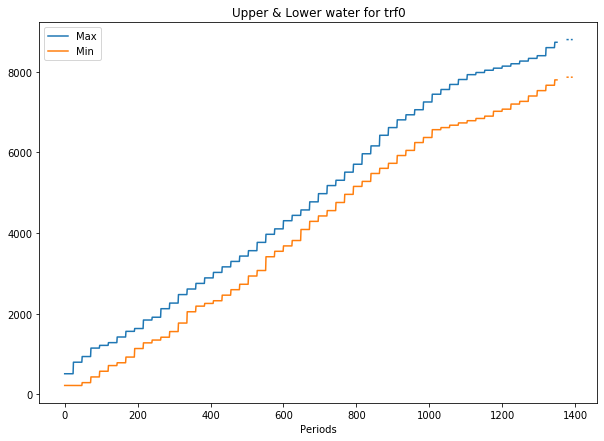

<Figure size 720x504 with 0 Axes>

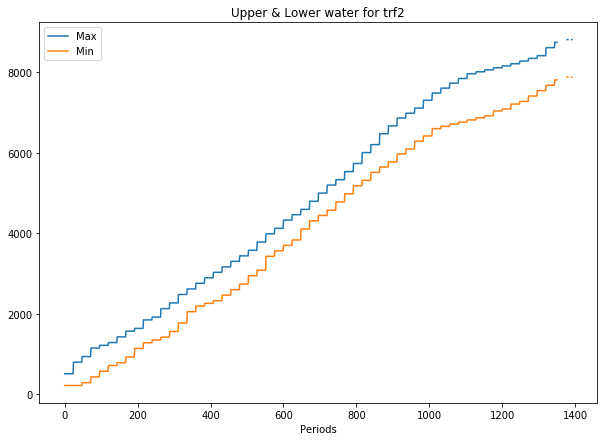

<Figure size 720x504 with 0 Axes>

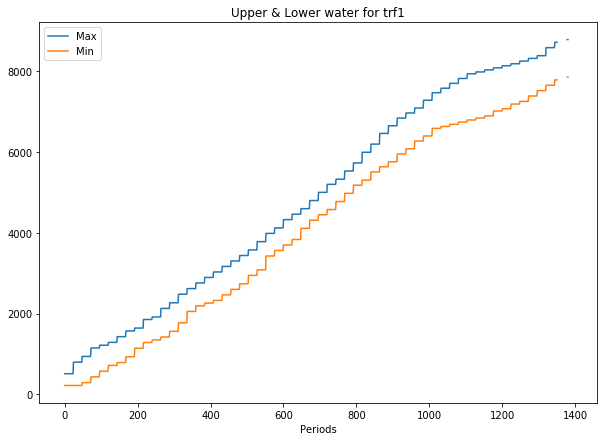

<Figure size 720x504 with 0 Axes>

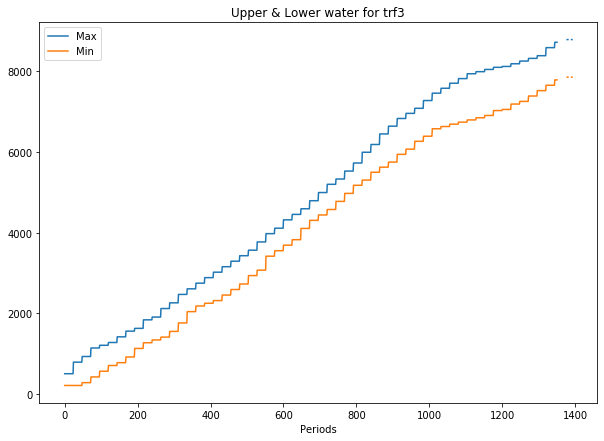

<Figure size 720x504 with 0 Axes>

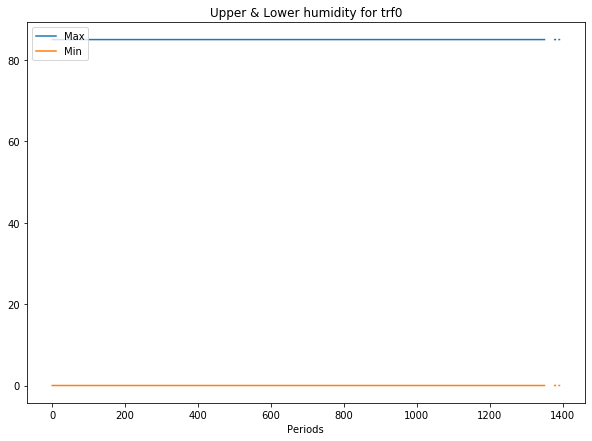

<Figure size 720x504 with 0 Axes>

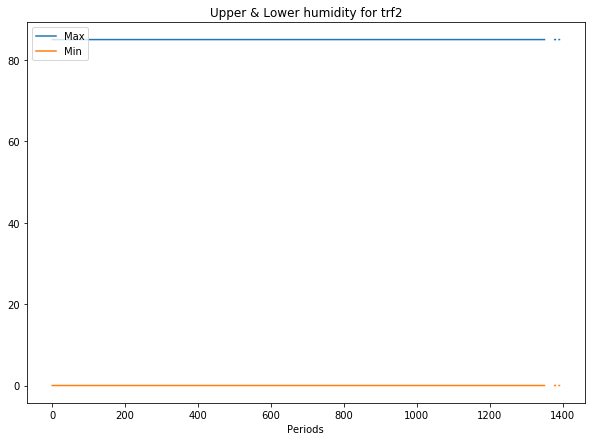

<Figure size 720x504 with 0 Axes>

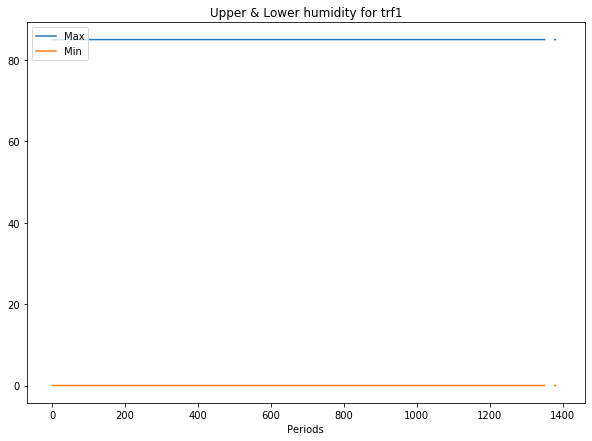

<Figure size 720x504 with 0 Axes>

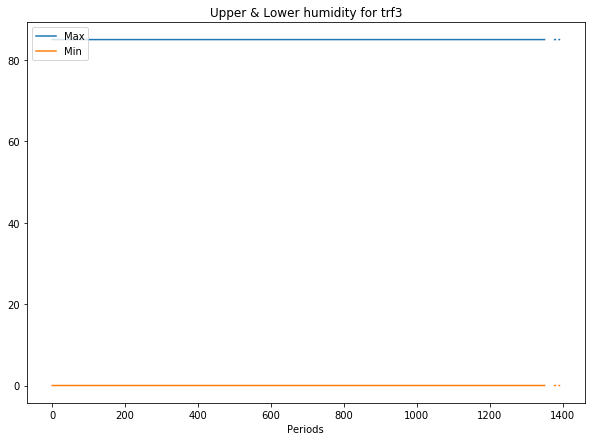

<Figure size 720x504 with 0 Axes>

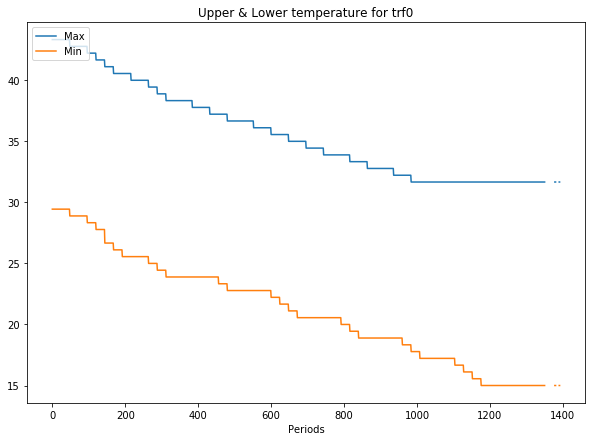

<Figure size 720x504 with 0 Axes>

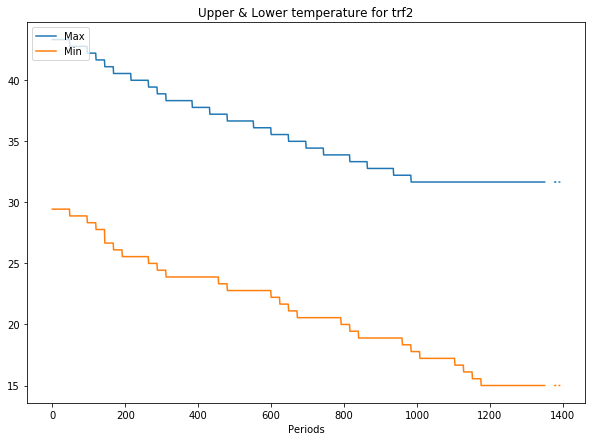

<Figure size 720x504 with 0 Axes>

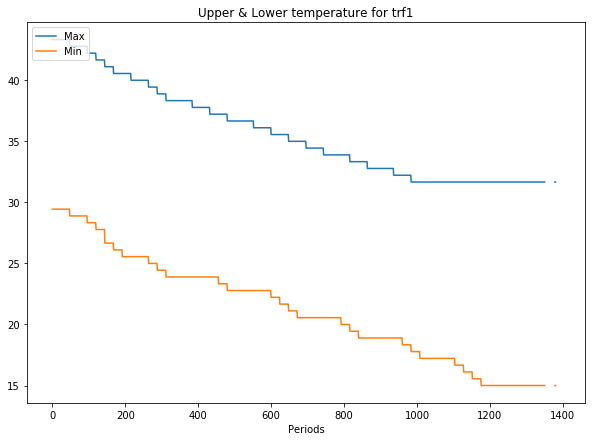

<Figure size 720x504 with 0 Axes>

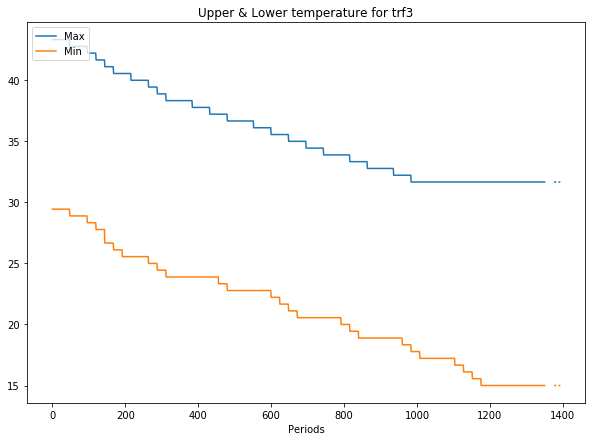

<Figure size 720x504 with 0 Axes>

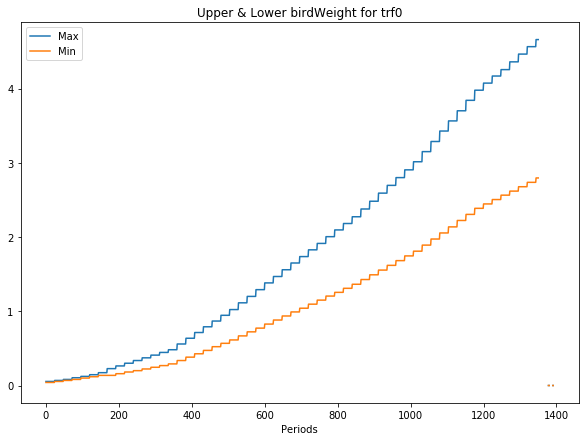

<Figure size 720x504 with 0 Axes>

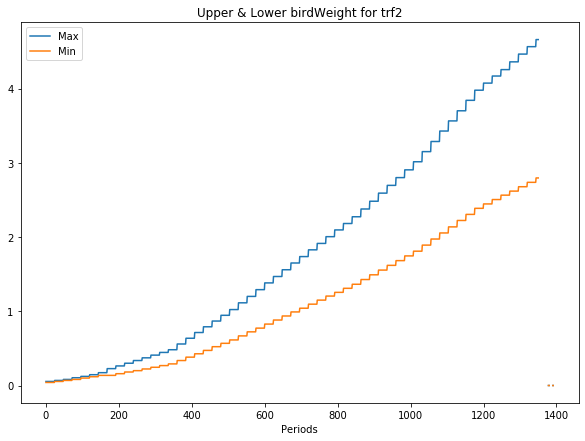

<Figure size 720x504 with 0 Axes>

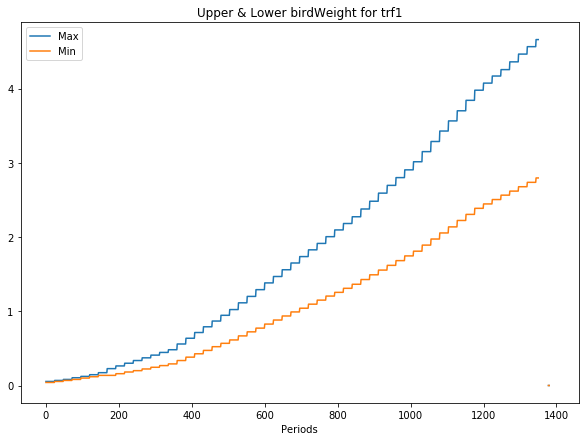

<Figure size 720x504 with 0 Axes>

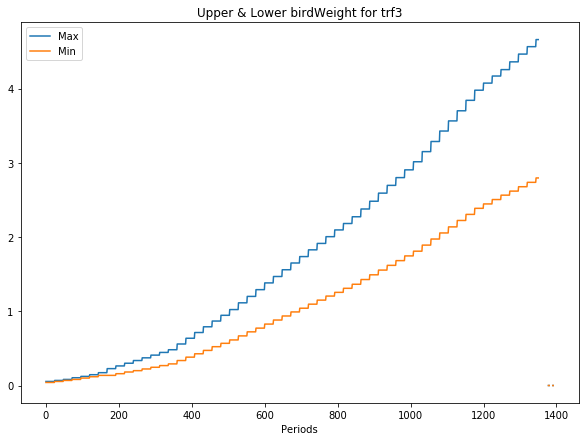

<Figure size 720x504 with 0 Axes>

In [56]:
uplwGraphs(targetFolder)